In [21]:
#initial set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns


In [22]:
#Data 
df = pd.read_csv('..//Data//HAM10000_metadata.csv')
df.count()

lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age              9958
sex             10015
localization    10015
dtype: int64

In [23]:
# clean data
clean_df = df.dropna(axis= 'rows')
clean_df = clean_df.loc[clean_df['sex'] != 'unknown']
clean_df = clean_df.loc[clean_df['localization'] != 'unknown']
clean_df.count()

lesion_id       9761
image_id        9761
dx              9761
dx_type         9761
age             9761
sex             9761
localization    9761
dtype: int64

In [24]:
#ages
bins = [0, 39.9 ,49.9, 59.9, 69.9, 79.9, 100]
group_names = ['Under Forty', 'Forties', 'Fifties', 'Sixties', 'Seventies', 'Over Eighty']
clean_df['Age Groups'] = pd.cut(clean_df['age'], bins, labels=group_names, include_lowest=True)

<AxesSubplot:xlabel='Age Groups', ylabel='Total Cases'>

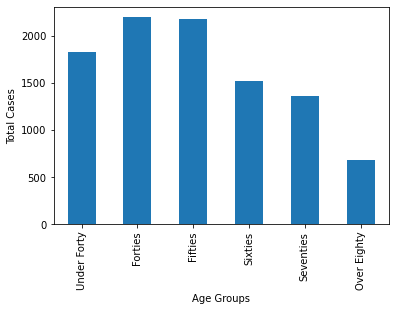

In [25]:
#labels ages 
clean_df.groupby(['Age Groups'])['age'].count().plot(kind='bar', ylabel="Total Cases")

<AxesSubplot:xlabel='localization', ylabel='Total  Cases'>

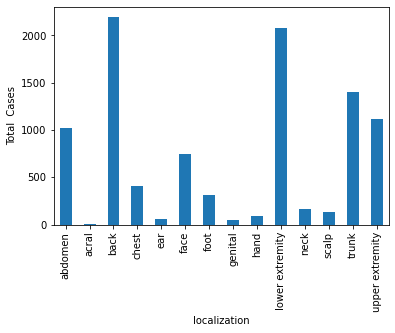

In [26]:
#localization v number of cases
clean_df.groupby(['localization'])['age'].count().plot(kind='bar', ylabel="Total  Cases", use_index=True)

<AxesSubplot:xlabel='dx', ylabel='Total  Cases'>

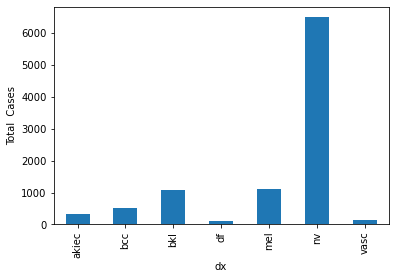

In [27]:
#dx v total cases 
clean_df.groupby(['dx'])['age'].count().plot(kind='bar', ylabel="Total  Cases", use_index=True)

<AxesSubplot:ylabel='Type'>

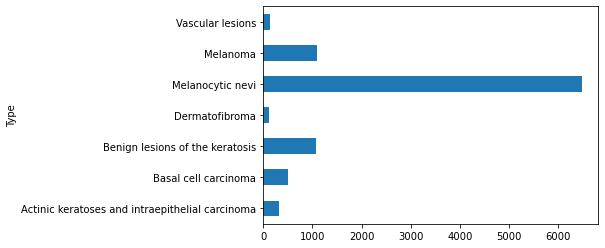

In [28]:
#dictionary name and abrv
fullnames = {'akiec':"Actinic keratoses and intraepithelial carcinoma",
            'bcc': "Basal cell carcinoma",
            'bkl': "Benign lesions of the keratosis",
            'df': "Dermatofibroma",
            'mel': "Melanoma",
            'nv':  "Melanocytic nevi",
            'vasc': "Vascular lesions"}

clean_df['fullname'] = clean_df.apply(lambda row: fullnames[row.dx], axis=1)
 
clean_df.groupby(['fullname'])['age'].count().plot(kind='barh', xlabel="Type", use_index=True)


<AxesSubplot:>

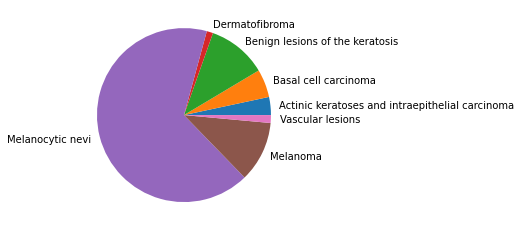

In [29]:
#types of cancers pie chart 
clean_df.groupby('fullname')['age'].count().plot(kind='pie', y='age', ylabel="")

<AxesSubplot:>

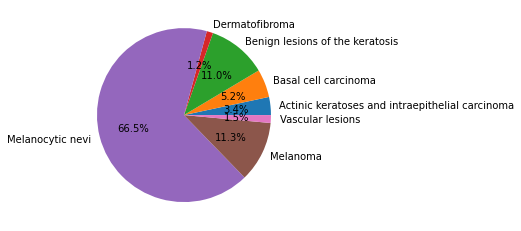

In [30]:
#with % 
clean_df.groupby('fullname')['age'].count().plot(kind='pie', y='age', ylabel="",autopct='%1.1f%%', legend=False)

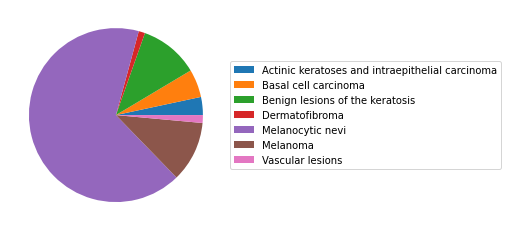

In [31]:
#w/legend
mypie=clean_df.groupby('fullname')['age'].count().plot(kind='pie', y='age', ylabel="", labeldistance=None, legend=True)
mypie.legend(loc='center left', bbox_to_anchor=(1, 0.5))

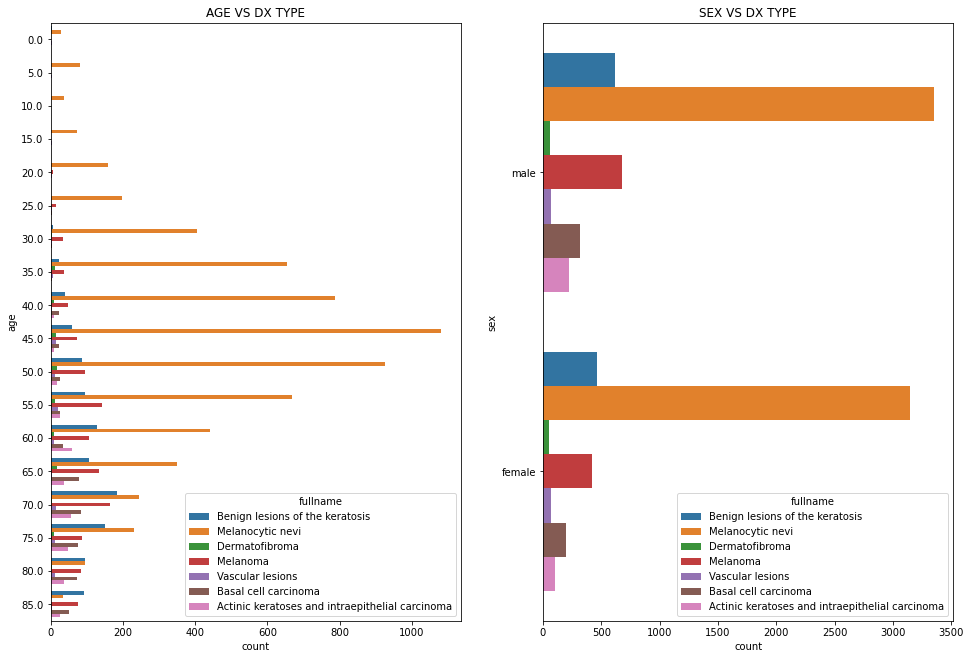

In [66]:
#Age v sex with cancer types

fullnames = {'akiec':"Actinic keratoses and intraepithelial carcinoma",
            'bcc': "Basal cell carcinoma",
            'bkl': "Benign lesions of the keratosis",
            'df': "Dermatofibroma",
            'mel': "Melanoma",
            'nv':  "Melanocytic nevi",
            'vasc': "Vascular lesions"}

plt.figure(figsize=(25,11))
plt.subplot(131)
plt.title('AGE VS DX TYPE',fontsize = 12)
sns.countplot(y='age', hue='fullname',data=clean_df)
plt.subplot(132)
plt.title('SEX VS DX TYPE',fontsize = 12)
sns.countplot(y='sex', hue='fullname',data=clean_df)

plt.show()


In [65]:
#clean data 

clean_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,Age Groups,fullname
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Over Eighty,Benign lesions of the keratosis
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Over Eighty,Benign lesions of the keratosis
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Over Eighty,Benign lesions of the keratosis
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Over Eighty,Benign lesions of the keratosis
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Seventies,Benign lesions of the keratosis
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Forties,Actinic keratoses and intraepithelial carcinoma
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Forties,Actinic keratoses and intraepithelial carcinoma
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Forties,Actinic keratoses and intraepithelial carcinoma
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Over Eighty,Actinic keratoses and intraepithelial carcinoma


TypeError: Image data of dtype object cannot be converted to float

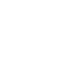

In [64]:

y = clean_df['dx_type'].values
X = clean_df.drop(['dx_type'] , axis=1).values

plt.figure(figsize=(10,20))
for i in range(0,99) :
    plt.subplot(20,5,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape(2,2,2))
    plt.title(y[i])

In [57]:
#images
sample_data = clean_df.groupby('dx').apply(lambda df: df.iloc[:2, [9, 7]])
plt.figure(figsize=(10, 22))
for i in range(99):
    plt.subplot(7, 5, i + 1)
    plt.imshow(np.squeeze(sample_data['image_pixel'][i]))
    img_label = sample_data['cell_type'][i]
    plt.title(img_label)
    plt.axis("off")
plt.show()

IndexError: positional indexers are out-of-bounds